In [102]:
#import Necessary Liabrary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
pip! install category_encoders

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "!"



In [71]:
import category_encoders as ce

In [72]:
#Import you CSV file and create a dataframe
dia=pd.read_csv('M6_T2_V1_Diamonds.csv')

In [73]:
#Print 5 First Row in the Data
dia.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [74]:
#Check Data Information
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [75]:
#Check Data Shape
dia.shape

(53940, 8)

In [76]:
#Convert Object Columns to Cateogory
dia['cut']=dia['cut'].astype('category')
dia['color']=dia['color'].astype('category')
dia['clarity']=dia['clarity'].astype('category')

In [77]:
#Recheck to confirm the conversion
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   price    53940 non-null  int64   
 5   x        53940 non-null  float64 
 6   y        53940 non-null  float64 
 7   z        53940 non-null  float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 2.2 MB


In [78]:
#Check for Missing Values
print(dia.isna().sum())

carat      0
cut        0
color      0
clarity    0
price      0
x          0
y          0
z          0
dtype: int64


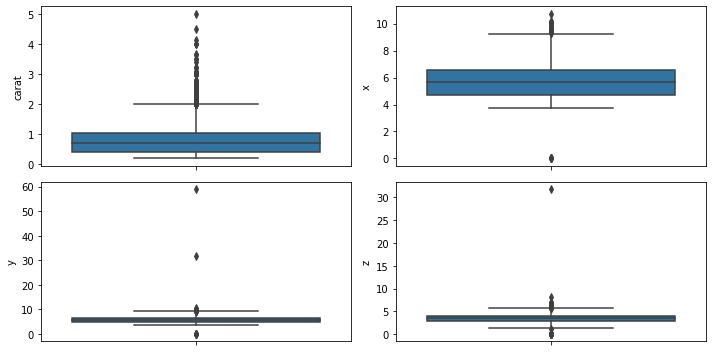

In [79]:
#Check for Outliars 
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.boxplot(y='carat', data=dia)

plt.subplot(2,2,2)
sns.boxplot(y='x', data=dia)

plt.subplot(2,2,3)
sns.boxplot(y='y', data=dia)

plt.subplot(2,2,4)
sns.boxplot(y='z', data=dia)

plt.tight_layout()
plt.show()

In [80]:
#Encode Categorical Columns using any encoding method here we are using binary encoder
binary_encoder = ce.BinaryEncoder(cols=['cut','color','clarity'])
dia_binary_ecoded=binary_encoder.fit_transform(dia)
print(dia_binary_ecoded)

       carat  cut_0  cut_1  cut_2  color_0  color_1  color_2  clarity_0  \
0       0.23      0      0      1        0        0        1          0   
1       0.21      0      1      0        0        0        1          0   
2       0.23      0      1      1        0        0        1          0   
3       0.29      0      1      0        0        1        0          0   
4       0.31      0      1      1        0        1        1          0   
...      ...    ...    ...    ...      ...      ...      ...        ...   
53935   0.72      0      0      1        1        1        1          0   
53936   0.72      0      1      1        1        1        1          0   
53937   0.70      1      0      0        1        1        1          0   
53938   0.86      0      1      0        1        0        0          0   
53939   0.75      0      0      1        1        1        1          0   

       clarity_1  clarity_2  clarity_3  price     x     y     z  
0              0          0      

In [81]:
#Return the encoded data into the original dataframe
dia=dia_binary_ecoded

In [82]:
dia

,carat,cut_0,cut_1,cut_2,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3,price,x,y,z
0,0.23,0,0,1,0,0,1,0,0,0,1,326,3.95,3.98,2.43
1,0.21,0,1,0,0,0,1,0,0,1,0,326,3.89,3.84,2.31
2,0.23,0,1,1,0,0,1,0,0,1,1,327,4.05,4.07,2.31
3,0.29,0,1,0,0,1,0,0,1,0,0,334,4.20,4.23,2.63
4,0.31,0,1,1,0,1,1,0,0,0,1,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,1,1,1,1,0,0,1,0,2757,5.75,5.76,3.50
53936,0.72,0,1,1,1,1,1,0,0,1,0,2757,5.69,5.75,3.61
53937,0.70,1,0,0,1,1,1,0,0,1,0,2757,5.66,5.68,3.56
53938,0.86,0,1,0,1,0,0,0,0,0,1,2757,6.15,6.12,3.74


# Used the below if you want to scaled the numerical features

In [83]:
#scaler=MinMaxScaler()
#Dscale=dia[['carat','price','x','y','z']]
#dia_scale=scaler.fit_transform(Dscale)
#print(dia_scale)
#Return_DataFrame=pd.DataFrame(dia_scale, columns=['carat','price','x','y','z'])

In [84]:
#Return_DataFrame

In [85]:
#for diam in Return_DataFrame.columns:
    #dia[diam]=Return_DataFrame[diam]

In [86]:
#dia

In [87]:
#Checking for Correlation
#y= dia['price']
#X= dia.drop(['price'], axis=1)

In [88]:
#mymatrix=X.corr()
#mymatrix

In [89]:
#mymatrixAll=dia.corr()
#mymatrixAll

In [90]:
#sns.regplot(x=dia.carat,y=dia.price,ci=None)

<AxesSubplot:>

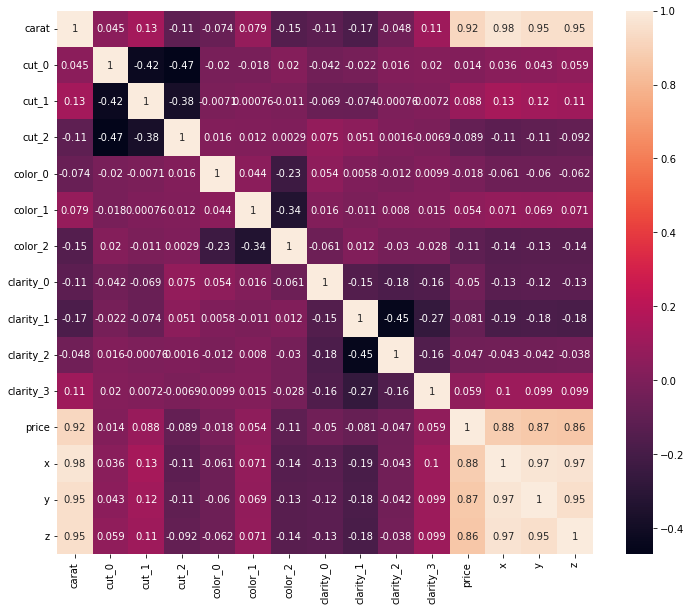

In [91]:
#using heatmap to check for columns that are highly correlated with the dependent variable
plt.figure(figsize=(12,10))
sns.heatmap(dia.corr(),annot=True)


In [96]:
# Features and target
X = dia[['carat','x','y','z']]
y = dia['price']

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [97]:
# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [98]:
#Check for intercept
intercept = model.intercept_
intercept

1799.7154292569953

In [99]:
#Check for slope
coef = model.coef_
coef

array([10143.12303308,  -854.15844089,   132.05480168,  -515.36606437])

In [100]:
#Conduct Prediction
y_pred = model.predict(X_test)

In [103]:
# Evaluate the model
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Absolute Error: 903.5291658423374
Mean Squared Error: 2260794.3634310486
Root Mean Squared Error: 1503.5938159726013
R^2 Score: 0.8573782517388897


In [105]:
#Split data for polynomial Regression
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [119]:
# Polynomial regression degree
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
X_poly

array([[ 1.    ,  0.23  ,  3.95  , ..., 15.8404,  9.6714,  5.9049],
       [ 1.    ,  0.21  ,  3.89  , ..., 14.7456,  8.8704,  5.3361],
       [ 1.    ,  0.23  ,  4.05  , ..., 16.5649,  9.4017,  5.3361],
       ...,
       [ 1.    ,  0.7   ,  5.66  , ..., 32.2624, 20.2208, 12.6736],
       [ 1.    ,  0.86  ,  6.15  , ..., 37.4544, 22.8888, 13.9876],
       [ 1.    ,  0.75  ,  5.83  , ..., 34.4569, 21.3668, 13.2496]])

In [120]:
#Fit Polynomial
poly_model = LinearRegression()
poly_model.fit(X_train_poly,  y_train)

LinearRegression()

In [121]:
#Make Prediction
y_pred_poly_fit = poly_model.predict(X_test_poly)
y_pred_poly_fit

array([6377.61424209, 7775.63772946, 6836.4450099 , ..., 5753.14864004,
       5524.14659955, 1152.53178516])

In [122]:
#Check for Accuaracy
print(f"Test R2: {r2_score(y_test, y_pred_poly_fit)}")

Test R2: 0.8692741037217986
